In [12]:
! pip install ace_tools

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import ace_tools as tools

ModuleNotFoundError: No module named 'ace_tools'

In [5]:
print(os.getcwd())  # Print the current working directory

c:\Users\Ankit\Documents\Milestone II project\Milestone_2\Vizs


In [66]:

# Define the correct data folder
data_folder = r"c:\Users\Ankit\Documents\Milestone II project\Milestone_2\Data"

# List of years from 2009 to 2022
years = list(range(2009, 2023))

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each year's file, read it, and append to the list
for year in years:
    file_path = os.path.join(data_folder, f"{year}_census_data.csv")
    if os.path.exists(file_path):  # Ensure the file exists
        df = pd.read_csv(file_path)
        df["Year"] = year  # Add a column to identify the year
        dfs.append(df)
        print(f"Loaded {year}_census_data.csv with {df.shape[0]} rows.")
    else:
        print(f"File {year}_census_data.csv not found, skipping.")

# Concatenate all DataFrames
if dfs:
    merged_df = pd.concat(dfs, ignore_index=True)
    
    # Save the merged dataset
    output_file = os.path.join(data_folder, "merged_census_data.csv")
    merged_df.to_csv(output_file, index=False)
    
    print(f"Merged dataset saved to {output_file} with {merged_df.shape[0]} total rows.")
else:
    print("No valid files found. Ensure the CSV files exist.")

# Display the first few rows of the merged DataFrame
merged_df.head()


Loaded 2009_census_data.csv with 3221 rows.
Loaded 2010_census_data.csv with 3221 rows.
Loaded 2011_census_data.csv with 3221 rows.
Loaded 2012_census_data.csv with 3221 rows.
Loaded 2013_census_data.csv with 3221 rows.
Loaded 2014_census_data.csv with 3220 rows.
Loaded 2015_census_data.csv with 3220 rows.
Loaded 2016_census_data.csv with 3220 rows.
Loaded 2017_census_data.csv with 3220 rows.
Loaded 2018_census_data.csv with 3220 rows.
Loaded 2019_census_data.csv with 3220 rows.
Loaded 2020_census_data.csv with 3221 rows.
Loaded 2021_census_data.csv with 3221 rows.
Loaded 2022_census_data.csv with 3222 rows.
Merged dataset saved to c:\Users\Ankit\Documents\Milestone II project\Milestone_2\Data\merged_census_data.csv with 45089 total rows.


,mil pop,unemployment %,mean income,median income,vacant housing units,rental vacany rate,% below poverty line,median house value,NAME,state,county,county_name,state_name,Year
0,16.00,(X),50181.00,87.00,498.00,3.80,(X),145300.00,"Jefferson County, Idaho",16,51,Jefferson County,Idaho,2009
1,13.00,(X),40322.00,47.00,663.00,4.70,(X),130600.00,"Jerome County, Idaho",16,53,Jerome County,Idaho,2009
2,12.00,(X),45446.00,1072.00,6212.00,3.50,(X),213000.00,"Kootenai County, Idaho",16,55,Kootenai County,Idaho,2009
3,29.00,(X),36448.00,196.00,1050.00,5.40,(X),173200.00,"Latah County, Idaho",16,57,Latah County,Idaho,2009
4,0.00,(X),38750.00,69.00,1136.00,8.50,(X),171400.00,"Lemhi County, Idaho",16,59,Lemhi County,Idaho,2009


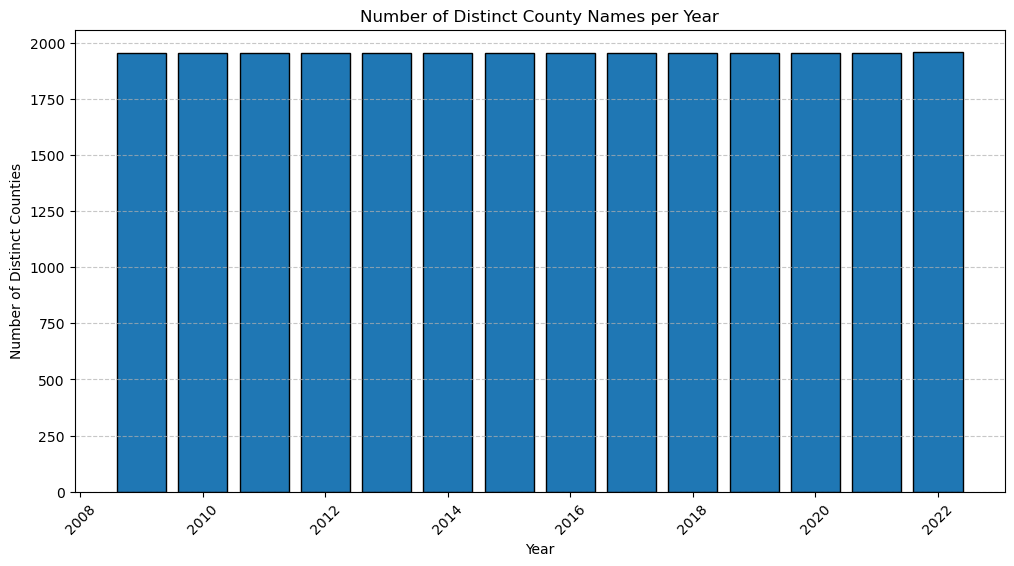

In [41]:
# Load the merged dataset
data_folder = r"c:\Users\Ankit\Documents\Milestone II project\Milestone_2\Data"
merged_file = os.path.join(data_folder, "merged_census_data.csv")

# Read the merged CSV
df = pd.read_csv(merged_file)

# Count distinct county names per year
distinct_counties = df.groupby("Year")["county_name"].nunique()

# Plot histogram
plt.figure(figsize=(12, 6))
plt.bar(distinct_counties.index, distinct_counties.values, edgecolor="black")
plt.xlabel("Year")
plt.ylabel("Number of Distinct Counties")
plt.title("Number of Distinct County Names per Year")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [8]:
distinct_counties = df.groupby("Year")["county_name"].nunique()
distinct_counties

Year
2009    1955
2010    1955
2011    1955
2012    1955
2013    1955
2014    1954
2015    1955
2016    1955
2017    1955
2018    1955
2019    1955
2020    1956
2021    1956
2022    1960
Name: county_name, dtype: int64

## As observed from the data, the number of counties remains relatively stable over the years, with data available for approximately 1,955 counties consistently.

In [ ]:
# Calculate the number of rows for each county
county_row_counts = df["NAME"].value_counts().reset_index()
county_row_counts.columns = ["NAME", "row_count"]

# Filter counties with more than 14 rows
counties_exceeding_14 = county_row_counts[county_row_counts["row_count"] > 14]

counties_exceeding_14

## As observed above, there are no duplicate rows. Each county has a maximum of 14 rows, corresponding to the 14 years of data, ensuring data consistency across counties.

In [11]:
import pandas as pd
import os

# Load the merged dataset
data_folder = r"c:\Users\Ankit\Documents\Milestone II project\Milestone_2\Data"
merged_file = os.path.join(data_folder, "merged_census_data.csv")

# Read the dataset
df = pd.read_csv(merged_file)

# Convert numeric columns to the correct data type
numeric_columns = [
    "mil pop", "unemployment %", "mean income", "median income",
    "vacant housing units", "rental vacany rate", "% below poverty line",
    "median house value"
]

# Convert columns to numeric to avoid aggregation errors
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Compute the median value for each column grouped by year
median_values = df.groupby("Year")[numeric_columns].median()

# Display the results in the notebook
from IPython.display import display
display(median_values)


,mil pop,unemployment %,mean income,median income,vacant housing units,rental vacany rate,% below poverty line,median house value
Year,,,,,,,,
2009,17.0,NaN,41322.0,121.0,1772.0,7.20,NaN,102000.0
2010,16.0,7.30,53667.0,42224.0,1836.0,7.30,10.60,105400.0
2011,15.0,8.00,55326.0,43194.0,1882.0,7.20,10.90,107200.0
2012,13.0,8.40,55899.0,43606.0,1931.0,7.00,11.30,107900.0
2013,11.0,8.80,56681.0,43888.0,1932.0,6.90,11.60,108600.0
2014,9.0,8.40,57744.0,44547.0,1961.0,6.60,11.70,109300.0
2015,8.0,7.60,58387.0,44748.5,2001.0,6.45,11.60,111600.0
2016,8.0,6.85,59990.0,45979.0,2024.0,6.30,11.25,114150.0
2017,8.0,6.10,62101.0,47636.5,2077.5,6.30,10.80,116850.0


## Below, we analyze the overall trends of all indicators to identify any sudden changes or assess whether they have remained relatively stable over time.

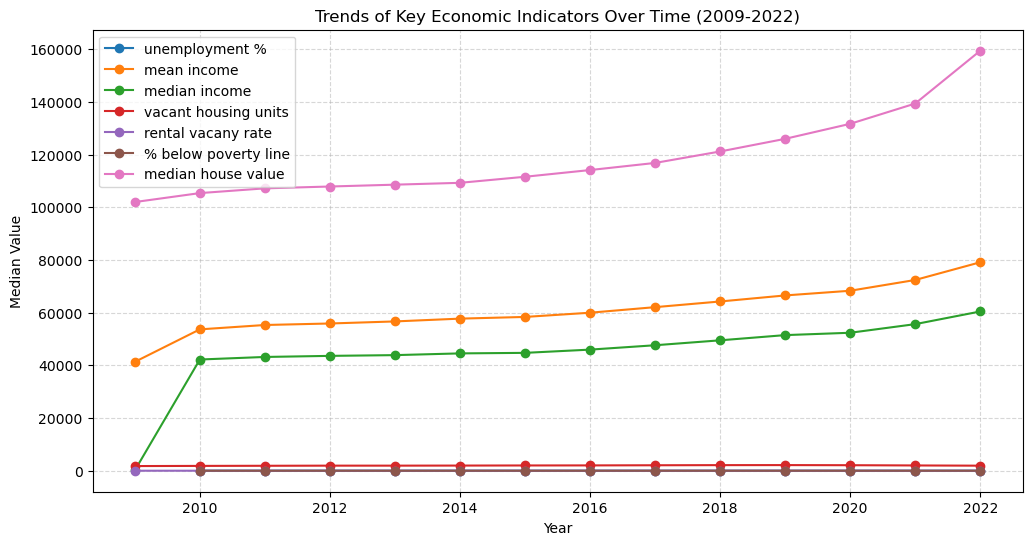

In [12]:
import matplotlib.pyplot as plt

# Select relevant columns for visualization
columns_to_plot = ["unemployment %", "mean income", "median income", 
                   "vacant housing units", "rental vacany rate", "% below poverty line", "median house value"]

# Scale "mil pop" for better visualization
median_values_scaled = median_values.copy()
# median_values_scaled["mil pop"] = median_values_scaled["mil pop"] * 1_000_000

# Plot line chart for trends over time
plt.figure(figsize=(12, 6))

for col in columns_to_plot:
    plt.plot(median_values_scaled.index, median_values_scaled[col], marker="o", label=col)

plt.xlabel("Year")
plt.ylabel("Median Value")
plt.title("Trends of Key Economic Indicators Over Time (2009-2022)")
plt.legend(loc="best")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


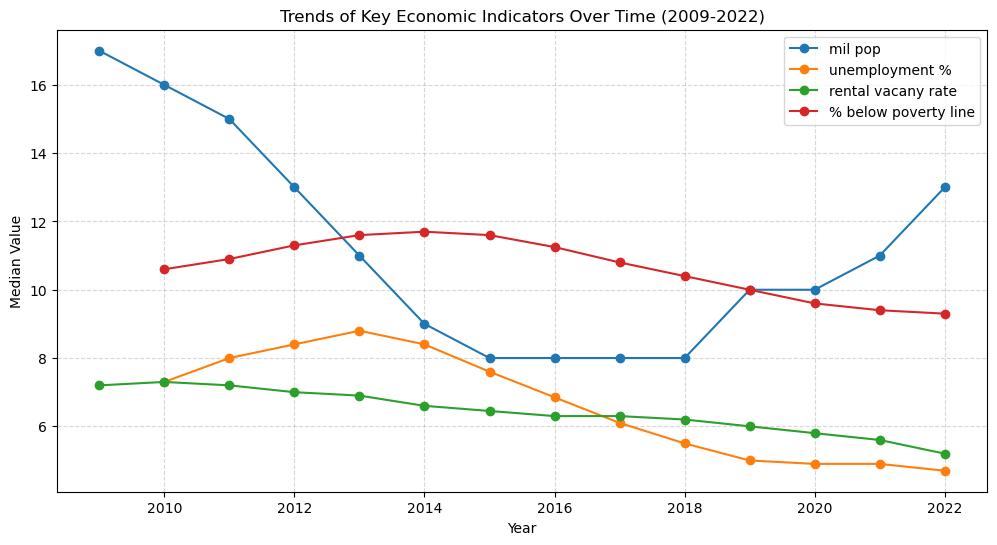

In [13]:
import matplotlib.pyplot as plt

# Select relevant columns for visualization
columns_to_plot = ["mil pop", "unemployment %",
                   "rental vacany rate", "% below poverty line"]

# Plot line chart for trends over time
plt.figure(figsize=(12, 6))

for col in columns_to_plot:
    plt.plot(median_values.index, median_values[col], marker="o", label=col)

plt.xlabel("Year")
plt.ylabel("Median Value")
plt.title("Trends of Key Economic Indicators Over Time (2009-2022)")
plt.legend(loc="best")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


## To inspect the data visually, let's identify the county with the highest change in military population between 2009 and 2022. We'll achieve this by calculating the absolute difference between the military population in these two years and extracting the county with the maximum change.

In [32]:
import pandas as pd
import os

# Define the correct data folder
data_folder = r"c:\Users\Ankit\Documents\Milestone II project\Milestone_2\Data"
merged_file = os.path.join(data_folder, "merged_census_data.csv")

# Read the dataset
df = pd.read_csv(merged_file)

# Convert "mil pop" column to numeric
df["mil pop"] = pd.to_numeric(df["mil pop"], errors='coerce')

# Filter data for only the years 2009 and 2022
df_filtered = df[df["Year"].isin([2009, 2022])]

# Pivot data to have 2009 and 2022 in separate columns
df_pivot = df_filtered.pivot(index="NAME", columns="Year", values="mil pop")

# Compute the population difference
df_pivot["pop_change"] = df_pivot[2022] - df_pivot[2009]

# Find the county with the maximum absolute population change
max_population_change_county = df_pivot["pop_change"].abs().idxmax()
max_population_change_value = df_pivot.loc[max_population_change_county, "pop_change"]

# Output the result
max_population_change_county, max_population_change_value


('San Diego County, California', 13198.0)

## Let's plot key economic indicators alongside military population to visually assess whether there is any observable correlation between a county's economic trends and its military population.

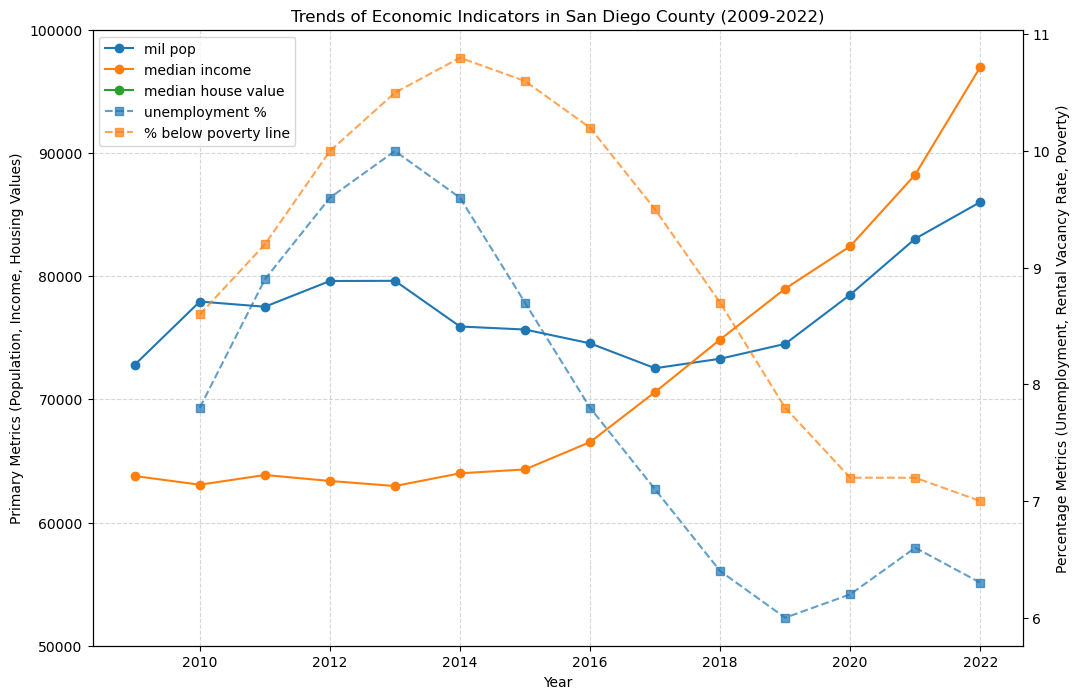

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the data folder path
data_folder = r"c:\Users\Ankit\Documents\Milestone II project\Milestone_2\Data"
merged_file = os.path.join(data_folder, "merged_census_data.csv")

# Read the dataset
df = pd.read_csv(merged_file)

# Convert numeric columns to the correct data type
numeric_columns = [
    "mil pop", "unemployment %", "mean income", "median income",
    "vacant housing units", "rental vacany rate", "% below poverty line",
    "median house value"
]

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Filter data for 'San Diego County, California'
county_df = df[df["NAME"] == "San Diego County, California"]

# Define columns for the primary and secondary y-axis
primary_columns = ["mil pop", "median income", "median house value"]
secondary_columns = ["unemployment %", "% below poverty line"]

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot primary axis data
for col in primary_columns:
    ax1.plot(county_df["Year"], county_df[col], marker="o", label=col)

ax1.set_xlabel("Year")
ax1.set_ylabel("Primary Metrics (Population, Income, Housing Values)")
ax1.set_title("Trends of Economic Indicators in San Diego County (2009-2022)")

# Set y-axis limits
ax1.set_ylim(50000, 100000)  # Setting the range for the first y-axis

# Create secondary axis
ax2 = ax1.twinx()
for col in secondary_columns:
    ax2.plot(county_df["Year"], county_df[col], marker="s", linestyle="--", label=col, alpha=0.7)

ax2.set_ylabel("Percentage Metrics (Unemployment, Rental Vacancy Rate, Poverty)")

# Merge legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="best")

ax1.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()


## In the example of **San Diego County, California**, we observe a potential correlation between key economic indicators and the number of individuals employed in the military. The trends suggest that fluctuations in military employment may be linked to broader economic conditions, such as changes in median income, housing values, and unemployment rates. This relationship highlights the significant role of military presence in shaping the county's economic landscape.

In [34]:
# Calculate the number of rows for each county
county_row_counts = df["NAME"].value_counts().reset_index()
county_row_counts.columns = ["NAME", "row_count"]

# Filter counties with more than 14 rows
counties_exceeding_14 = county_row_counts[county_row_counts["row_count"] > 14]

counties_exceeding_14


,NAME,row_count


In [25]:
df[df["county_name"]=="Washington County"]

,mil pop,unemployment %,mean income,median income,vacant housing units,rental vacany rate,% below poverty line,median house value,NAME,state,county,county_name,state_name,Year
18,0.0,NaN,35897.0,68.0,329.0,3.9,NaN,139800.0,"Washington County, Idaho",16,87,Washington County,Idaho,2009
113,5.0,NaN,52527.0,74.0,482.0,3.9,NaN,99300.0,"Washington County, Illinois",17,189,Washington County,Illinois,2009
208,5.0,NaN,38123.0,72.0,1210.0,5.8,NaN,96500.0,"Washington County, Indiana",18,175,Washington County,Indiana,2009
279,0.0,NaN,34738.0,53.0,1792.0,2.6,NaN,73600.0,"Washington County, Alabama",1,129,Washington County,Alabama,2009
397,200.0,NaN,43317.0,1636.0,8078.0,10.8,NaN,152100.0,"Washington County, Arkansas",5,143,Washington County,Arkansas,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44630,27.0,2.7,96797.0,70043.0,2601.0,3.4,7.8,248300.0,"Washington County, Texas",48,477,Washington County,Texas,2022
44672,69.0,3.1,99534.0,71976.0,11607.0,5.8,5.7,417400.0,"Washington County, Utah",49,53,Washington County,Utah,2022
44686,127.0,3.0,98630.0,77278.0,5531.0,3.6,6.4,278000.0,"Washington County, Vermont",50,23,Washington County,Vermont,2022
44779,11.0,4.2,80206.0,59116.0,3496.0,5.6,7.7,181000.0,"Washington County, Virginia",51,191,Washington County,Virginia,2022


In [ ]:

pd.options.display.float_format = '{:.2f}'.format

In [69]:
df.describe(percentiles=[0.25, 0.50, 0.75])

,mil pop,mean income,median income,vacant housing units,rental vacany rate,median house value,state,county,Year
count,45089.00,45089.00,45089.00,45089.00,45089.00,45089.00,45089.00,45089.00,45089.00
mean,-19372.67,43410.36,-37692.15,5113.19,7.27,-275015.58,31.29,102.99,2015.50
std,4186127.05,4186466.18,8038714.58,12677.87,4.86,16841132.52,16.28,106.76,4.03
min,-888888888.00,-888888888.00,-888888888.00,15.00,0.00,-888888888.00,1.00,1.00,2009.00
25%,0.00,51233.00,38006.00,936.00,4.30,88900.00,19.00,35.00,2012.00
50%,11.00,60561.00,46367.00,1978.00,6.40,118300.00,30.00,79.00,2015.00
75%,62.00,71963.00,55750.00,4477.00,9.10,165800.00,46.00,133.00,2019.00
max,86010.00,216684.00,185136.00,245069.00,70.60,1441300.00,72.00,840.00,2022.00


## As observed in the dataset, there are negative values in the "median income" and "median house value" columns. Since negative values are not logically valid for any numerical column, we should remove them from the dataset to ensure data integrity.

In [70]:
# Define file path
file_path = r"c:\Users\Ankit\Documents\Milestone II project\Milestone_2\Data\merged_census_data.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Define numeric columns
numeric_cols = ["mil pop", "unemployment %", "mean income", "median income",
                "vacant housing units", "% below poverty line", "median house value"]

# Convert all numeric columns to proper data type
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Filter out rows with negative values
df_cleaned = df[(df[numeric_cols] >= 0).all(axis=1)]


In [63]:
numeric_cols

['mil pop',
 'unemployment %',
 'mean income',
 'median income',
 'vacant housing units',
 '% below poverty line',
 'median house value']

In [71]:
df_cleaned

,mil pop,unemployment %,mean income,median income,vacant housing units,rental vacany rate,% below poverty line,median house value,NAME,state,county,county_name,state_name,Year
3221,13.00,10.10,19689.00,12927.00,1092.00,3.90,54.30,81300.00,"Comerío Municipio, Puerto Rico",72,45,Comerío Municipio,Puerto Rico,2010
3222,38.00,33.60,17253.00,11870.00,2440.00,5.20,59.00,74900.00,"Guánica Municipio, Puerto Rico",72,55,Guánica Municipio,Puerto Rico,2010
3223,143.00,6.50,51519.00,34253.00,8713.00,14.20,16.60,161400.00,"Clarke County, Georgia",13,59,Clarke County,Georgia,2010
3224,0.00,20.50,33712.00,26250.00,802.00,16.90,25.50,58500.00,"Clay County, Georgia",13,61,Clay County,Georgia,2010
3225,759.00,13.10,52802.00,43311.00,17653.00,17.20,13.60,127800.00,"Clayton County, Georgia",13,63,Clayton County,Georgia,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45084,19.00,16.30,37287.00,23701.00,5108.00,9.20,38.20,115900.00,"Vega Baja Municipio, Puerto Rico",72,145,Vega Baja Municipio,Puerto Rico,2022
45085,0.00,13.10,21821.00,17062.00,2462.00,19.60,49.00,114500.00,"Vieques Municipio, Puerto Rico",72,147,Vieques Municipio,Puerto Rico,2022
45086,19.00,13.90,33109.00,22461.00,1527.00,0.80,39.40,101900.00,"Villalba Municipio, Puerto Rico",72,149,Villalba Municipio,Puerto Rico,2022
45087,31.00,11.10,27239.00,19972.00,2616.00,1.50,44.80,93900.00,"Yabucoa Municipio, Puerto Rico",72,151,Yabucoa Municipio,Puerto Rico,2022


## We now have 41,837 rows remaining out of the original 45,089, which accounts for 92.79% of the initial dataset. Since this reduction is within an acceptable range, we will proceed with the cleaned data for further analysis.

In [72]:
cleaned_file_path = r"c:\Users\Ankit\Documents\Milestone II project\Milestone_2\Data\cleaned_census_data.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to {cleaned_file_path}")

Cleaned dataset saved to c:\Users\Ankit\Documents\Milestone II project\Milestone_2\Data\cleaned_census_data.csv


In [73]:
df_cleaned.describe(percentiles=[0.25, 0.50, 0.75])

,mil pop,unemployment %,mean income,median income,vacant housing units,rental vacany rate,% below poverty line,median house value,state,county,Year
count,41837.00,41837.00,41837.00,41837.00,41837.00,41837.00,41837.00,41837.00,41837.00,41837.00,41837.00
mean,340.79,7.16,64686.07,49530.45,5144.46,7.22,12.20,145175.51,31.29,102.96,2016.00
std,2255.90,4.02,18756.46,15086.17,12726.60,4.86,7.63,91963.25,16.28,106.72,3.74
min,0.00,0.00,15294.00,10499.00,30.00,0.00,0.00,16800.00,1.00,1.00,2010.00
25%,0.00,4.50,52907.00,40101.00,944.00,4.30,7.50,89900.00,19.00,35.00,2013.00
50%,11.00,6.40,61723.00,47539.00,1994.00,6.40,10.60,119600.00,30.00,79.00,2016.00
75%,60.00,9.00,72894.00,56618.00,4518.00,9.00,14.60,167000.00,46.00,133.00,2019.00
max,86010.00,40.90,216684.00,170463.00,245069.00,70.60,64.00,1441300.00,72.00,840.00,2022.00


## Few things to be kept in the mind (observations derived from data) 
### Handling Skewness & Outliers
Identify extreme values in key features like military population (mil pop), median house value (median house value), and unemployment rate (unemployment %).
Apply log transformation to normalize highly skewed distributions, especially for features with large differences between the minimum and maximum values.
### Feature Scaling (Avoiding Feature Domination)
Standardize or normalize all numerical features to ensure that no single feature dominates the clustering process due to its scale.
Use MinMax scaling or standardization techniques so that all features contribute equally to distance-based clustering algorithms.
### Selecting the Right Features
Use only relevant numerical features that capture economic and demographic characteristics, such as mil pop, median income, median house value, unemployment %, and % below poverty line.
